### Week 9 
### Clustering, Latent Variable models and some Portfolio optimization



Possible Additional reading: 

- Image Segmentation using K-means Clustering Algorithm and
Subtractive Clustering Algorithm
- Quantitative equity portfolio management: modern techniques and applications
- Financial Econometrics: From Basics to Advanced Modeling Techniques

### I. Clustering (continued)

#### I.1. Back to K-means: Quantization and Segmentation

Clustering algorithms can be used in a variety of applications. An important example of such applications is quantization. 


__Exercise I.1.1__ Load each of the images 'roadSignEasy', 'roadSignMedium' and 'roadSignHarder' shown below and try to use K-means in the RGB space first to extract the letters from the road sign. Try to use your own K means code. Display the resulting black and white image.

<img src="roadSignHarder.jpg" alt="Drawing" style="width: 400px;"/>

image credit:  [Shouse California Law Group](https://www.shouselaw.com/) 

In [ ]:
# put your code here





__Exercise I.1.2__ Try to define additional features to improve the segmentation. You can for example work in a 5D space not only including the RGB triples but also the (X,Y) location of each pixel. 

__Bonus__ : Use your own image

In [ ]:
# put your code here 





### II. Latent Variable models 

### II.1 Principal component Analysis, Warm up

In principal component Analysis, we are interested in capturing the directions in which most of the variation occurs within a given dataset.  

__Exercise II.1.a__ To get some intuition on PCA, generate 3D data points along a plane of your choice. To do this, first fix the equation of the plane. Then use the equation you chose to generate points on the plane and perturb the points using small random Gaussian noise. Plot the resultin the points.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# put the code here

__Exercise II.1.b__ now that you have the noisy points, compute the first, second and third principal direction and represent them on your 3D scatter plot. 

In [ ]:
# put the code here


__Exercise II.1.c__ Project the points onto the the principal plane. and represent the projection on your scatter plot.


### II.2 Principal component Analysis: Image compression

__Exercise II.2.a__ As a second exercise, we will study the use of PCA for the compression of images. Load and display the image "shapes.png".  Start by computing, sorting and plotting the singular values of the matrix. 

In [ ]:
from numpy import linalg as LA


# Your answer


__Exercise II.2.b__ For any given matrix $\boldsymbol X$ and number of components $K$, the approximation of $X$ through the first $k$ principal components can be obtained by computing the SVD and retaining the first (i.e. largest) singular values and vectors. Concretely, if the SVD of $\boldsymbol X$ is given by $\boldsymbol U\boldsymbol\Sigma \boldsymbol V^T$, the approximation can be computed as $\boldsymbol U_k\boldsymbol\Sigma_k \boldsymbol V_k^T$ where $U_k$ encodes the first $k$ columns of $U$, $V_k$ encodes the first $k$ rows of $V$ and $S_k$ is the $k$ by $k$ matrix retaining the $k$ largest singular values of $\boldsymbol X$. 

Compute the compressed/approximated image for various values of $k$ (lets say $5$, $10$, $30$ and $50$) and display the results.

In [ ]:
from numpy import linalg as LA
import numpy as np
import matplotlib.pyplot as plt

# put your code here




### II.3. Towards Portfolio optimization
(The exercise is inspired by [quantopian](https://www.quantopian.com/about))


<img src="portfolio.png" alt="Drawing" style="width: 500px;"/>

image credit:  [https://emerj.com/](https://emerj.com/ai-future-outlook/machine-learning-finance-interviews-podcasts/) 

__Exercise II.3.a__ As a second exercise, we will study how PCA can be used to optimize portfolios. Start by downloading the data from the following 10 stocks, 

IBM, MSFT, FB, T, INTC, ABX, NEM, AU, AEM, GFI. 

5 of those stocks come from tech companies, the remaining 5 come from gold mining companies

Load the stock prices between 2015-09-01 and 2016-11-01. Plot the results



In [ ]:
import yfinance as yf

start_date = '2015-09-01' 
end_date = '2016-11-01'

# put your code here

In [33]:
What you should obtain:


<img src="Portfolio1.png" alt="Drawing" style="width: 500px;"/>

image credit:  [https://emerj.com/](https://emerj.com/ai-future-outlook/machine-learning-finance-interviews-podcasts/) 

__Exercise II.3.b__ Store the stocks in a single matrix with rows = number of dates, columns = number of stocks in your portfolio. Then compute the PCA decomposition using the PCA decomposition from Scikit-learn. 


In [ ]:
from sklearn.decomposition import PCA


__Exercise II.3.c__ The PCA implementation from Scikit learn comes witn an attribute that enables you to determine the fraction of the total variance explained by the components you extract. Compute the percentage of the variance. 

In [ ]:
# put your result here


__Exercise II.3.d__ The principal components can be understood as encoding some underlying statistical factors that "drive" the return of the portfolio. we can then look at how much of the closing price evolution of each stock is driven by the hidden factors. To see this, we can, as we did for the image, compute the representation of each stock as a combination of the factors. Those representations are known as "factor returns". Plot those returns.


In [ ]:
# put the code here

__Exercise II.3.e__

Aside from the factor returns, we might want to investigate the factor exposures for each stock in the portfolio which are basically your principal components. Those components indicates how strongly each of the stock is influenced by the principal components. Plot those values in the (PCA1, PCA2) plane. 

In [ ]:
# put your code here



### II.4. EigenFaces. 

Now that we have a better understanding of PCA, we can go back to the face dataset. Use the lines below to load the face images from the 'Labeled Faces in the Wild' dataset. Start by computing the decomposition of each face on the first $150$ principal faces. Then learn a Support vector classifier for the resulting dataset using radial basis functions and parameters $C=1000.0$ and $\gamma=0.005$

In [ ]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

n_samples, h, w = lfw_people.images.shape
X = lfw_people.data
n_features = X.shape[1]


y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

### II.5. Independent component analysis: The coktail party 

In this exercise, we will use another approach to dimensionality reduction, known as independent component analysis (ICA). ICA is particularly useful in speech or more generally, source separation. In the classical version of this problem, known as "The coktail party problem", one is interested in recovering two distinct signals from their mixing. 

<img src="ConversationMovie.jpg" alt="Drawing" style="width: 400px;"/>

image credit:  [The conversation](https://en.wikipedia.org/wiki/The_Conversation) 

__Exercise II.4.a.__ Using the FastICA transform from scikit-learn, recover the two speeches from the mixed1.wav and mixed1.wav files which are given on github. 

(Hint: start by storing the two signals 'samples1' and 'samples1' into a single matrix, then pass this matrix as an input to the FastICA method of Scikit-learn) 

In [ ]:
print(__doc__)

import os
import wave
import pylab
import matplotlib

import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

from sklearn.decomposition import FastICA, PCA

###############################################################################


# read data from wav files
sample_rate1, samples1 = wavfile.read('mixed1.wav')
sample_rate2, samples2 = wavfile.read('mixed2.wav')

print 'sample_rate1', sample_rate1
print 'sample_rate2', sample_rate2

# Use FastICA



__Exercise II.4.b.__ Once you have recovered the original signals, plot them as time series. Then use the lines below to store them in new .wav file. Then play them and compare them with their mixings.

In [ ]:

# write data to wav files
scaled1 = np.int16(recovered[:,0]/np.max(np.abs(recovered[:,0])) * 32767)
wavfile.write('recovered-1.wav', sample_rate1, scaled1)

scaled2 = np.int16(recovered[:,1]/np.max(np.abs(recovered[:,1])) * 32767)
wavfile.write('recovered-2.wav', sample_rate2, scaled2)


### III Manifold Learning

In this exercise, we will get familiar with the most popular manifold learning methods (see http://www.augustincosse.com/wp-content/uploads/2018/11/slides10.pdf for a review of the theory) 

__III.1. Getting some intuition: the moving ball__ Consider the sequence of frames defined below. Those frames are encoded as columns of the data matrix. Use the MDS and then ISOMAP algorithms to get an intuition on the trajectory followed by the white ball.

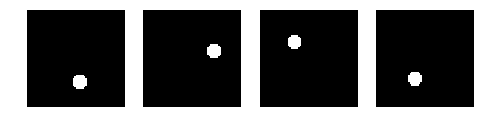

In [37]:
import numpy as np
import matplotlib.pyplot as plt

radius = 15

radius2 = 5


theta = np.linspace(0, 2*np.pi, num=50)


simple_movie = np.zeros((64,64,50))


for k in range(0,50):

        
    xpos = np.rint(32 + radius*np.cos(theta[k]))
    ypos = np.rint(32 + radius*np.sin(theta[k]))
    
    for i in range(0,simple_movie.shape[0]):
        for j in range(0,simple_movie.shape[1]):
    
            if (i-xpos)**2 + (j-ypos)**2 < radius2**2:
        
                simple_movie[i,j,k] = 1

plt.figure(1, figsize=(8, 3))
plt.subplot(141)  
plt.imshow(simple_movie[:,:,1],interpolation='nearest',cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(142)  
plt.imshow(simple_movie[:,:,15],interpolation='nearest',cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(143)  
plt.imshow(simple_movie[:,:,30],interpolation='nearest',cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(144)  
plt.imshow(simple_movie[:,:,45],interpolation='nearest',cmap=plt.cm.gray)
plt.axis('off')
plt.show()

__Exercise III.2.__ Try fancies trajectories. Ex let the ball move along a 8 shape. Then apply MDS and ISOMAP.